<a href="https://colab.research.google.com/github/itsJeromeJ/Prodigy_ds_05/blob/main/Prodigy_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
data=pd.read_csv('/content/accident data.csv')

In [5]:
data.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [12]:
data['Accident Date'] = pd.to_datetime(data['Accident Date'], format='%d-%m-%Y')

In [7]:
data.fillna({'Road_Type': 'Unknown', 'Weather_Conditions': 'Unknown', 'Light_Conditions': 'Unknown'}, inplace=True)

In [8]:
data['Hour'] = data['Accident Date'].dt.hour
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
data['Time_of_Day'] = pd.cut(data['Hour'], bins=bins, labels=labels, include_lowest=True)

In [9]:
print(data.isnull().sum())

Index                        0
Accident_Severity            0
Accident Date                0
Latitude                    25
Light_Conditions             0
District Area                0
Longitude                   26
Number_of_Casualties         0
Number_of_Vehicles           0
Road_Surface_Conditions    726
Road_Type                    0
Urban_or_Rural_Area         15
Weather_Conditions           0
Vehicle_Type                 0
Hour                         0
Time_of_Day                  0
dtype: int64


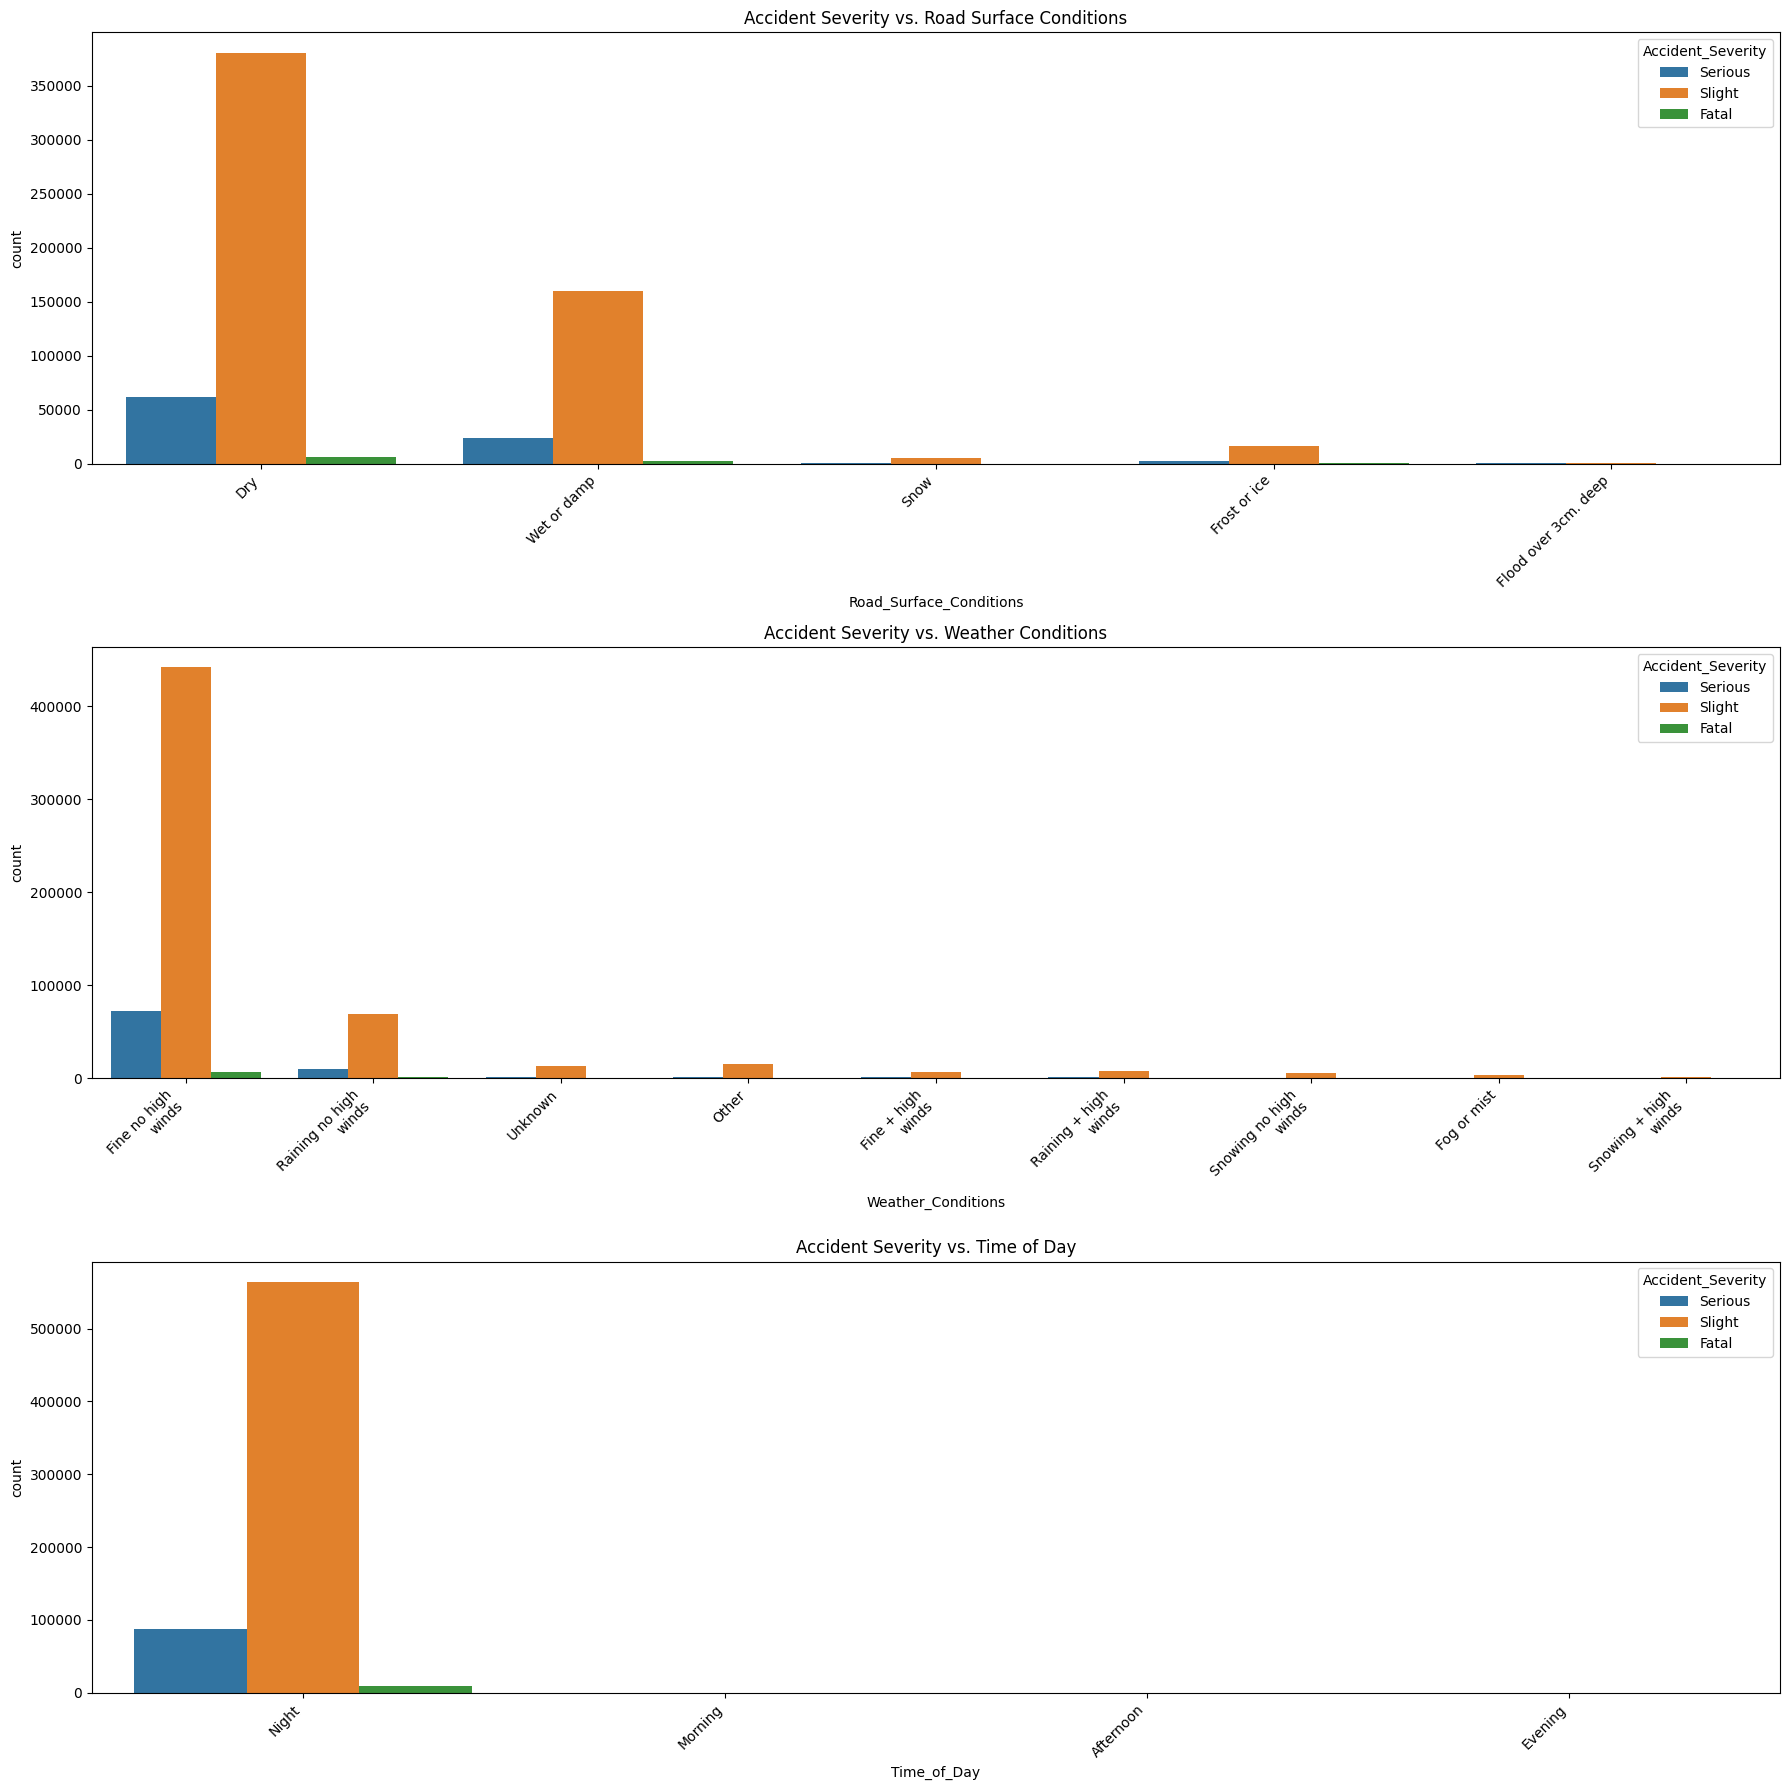

In [30]:
# Set the overall figure size for all plots
plt.figure(figsize=(18, 18))  # Adjust the figure size to fit all subplots

# 1. Analyze the relationship between road conditions and accident severity
plt.subplot(3, 1, 1)  # Create the first subplot in a 3x1 grid
sns.countplot(x='Road_Surface_Conditions', hue='Accident_Severity', data=data)
plt.title('Accident Severity vs. Road Surface Conditions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# 2. Analyze the relationship between weather conditions and accident severity
plt.subplot(3, 1, 2)  # Create the second subplot in a 3x1 grid
sns.countplot(x='Weather_Conditions', hue='Accident_Severity', data=data)
plt.title('Accident Severity vs. Weather Conditions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# 3. Analyze the relationship between time of day and accident severity
plt.subplot(3, 1, 3)  # Create the third subplot in a 3x1 grid
sns.countplot(x='Time_of_Day', hue='Accident_Severity', data=data)
plt.title('Accident Severity vs. Time of Day')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Adjust layout to prevent overlap and show all plots together
plt.tight_layout()

# Display the plots
plt.show()


In [17]:
# Filter out rows where 'Latitude' or 'Longitude' is NaN
filtered_data = data.dropna(subset=['Latitude', 'Longitude'])

# Check if the filtered data still contains NaNs in the coordinates
print(filtered_data[['Latitude', 'Longitude']].isnull().sum())


Latitude     0
Longitude    0
dtype: int64


<ipython-input-35-0099ba6f1f9c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='viridis')


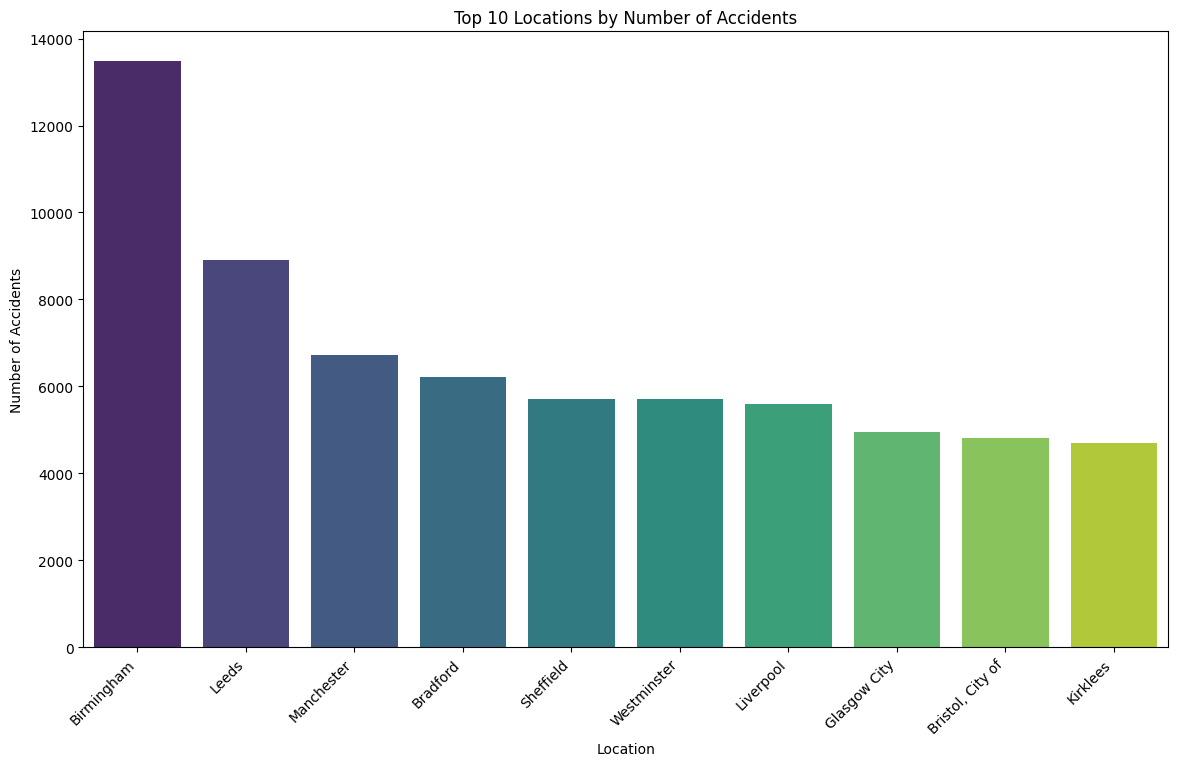

In [35]:

# Count the number of accidents per location and get the top 10 locations
top_10_locations = data['District Area'].value_counts().head(10)

# Create a bar chart for the top 10 locations
plt.figure(figsize=(14, 8))  # Increase the figure size for better readability
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='viridis')
plt.title('Top 10 Locations by Number of Accidents')
plt.xlabel('Location')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Index(['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles'], dtype='object')


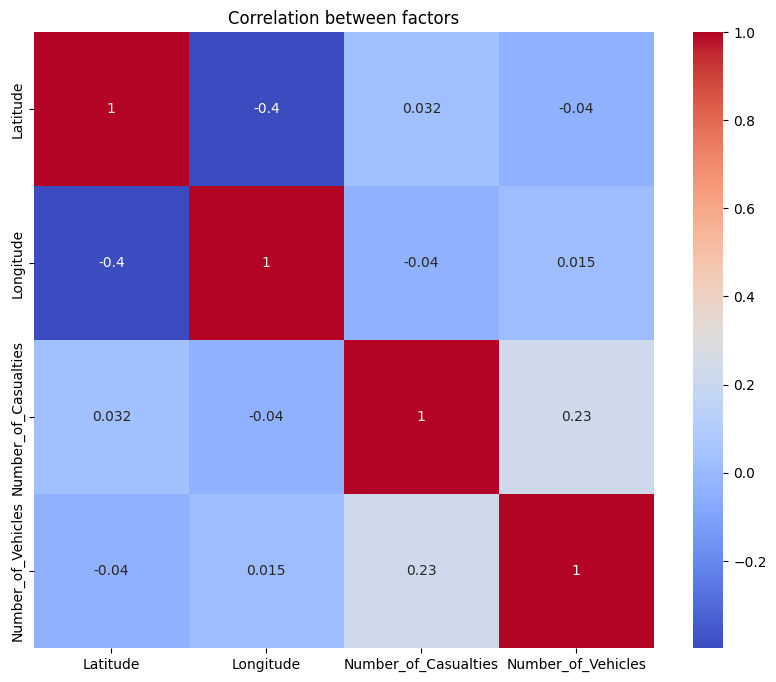

In [21]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Display the columns to ensure only numeric ones are selected
print(numeric_data.columns)
# Generate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between factors')
plt.show()
